# Assignment2 - Supervised Learning flow

# Part 1(a) Student details:
* Please write the First-Name, First letter of Last-Name and last 4 digits of the i.d. for each student. 

In [ ]:
# Amit W 2835
# Yaniv H 3905                      
# Ori Z 3678

## Part 1(b) - Chat-GPT/other AI-agent/other assistance used:
* If you changed the prompt until you got a satisfying answer, please add all versions
* don't delete "pre" tags, so new-line is supported
* double click the following markdown cell to change
* press shift+enter to view
* Add information:

#### Add information in this Markdown cell (double click to change, shift-enter to view)
<pre>   
AI agent name: CHAT -GPT
Goal: understanding the syntaxes of models and documentation, how to load and extract features from pictures 
Propmpt1: it was not a single prompt so i cannot elaborate on that
    
Propmpt2:
    
Propmpt3: 


AI agent name 2:
Goal:
Propmpt1:
    
Propmpt2:
    
Propmpt3: 

Other assistanse:    
</pre>

## Part 1(c) - Learning Problem and dataset explaination.
* Please explain in one paragraph
* don't delete "pre" tags, so new-line is supported
* double click the following markdown cell to change
* press shift+enter to view
* Add explaining text:

#### Add information in this Markdown cell (double click to change, shift-enter to view)
<pre>

this dataset contains 5 different types of rice grains. 
what we came to achieve is a model that can best differentiate bettween those types.   

    
</pre>

## Part 2 - Initial Preparations 
You could add as many code cells as needed

In [2]:
#one time install for the scikit-image,tensoflow

#!pip install scikit-image
#!pip install tensorflow

#imports 

import time
import random
import string
import re
import math
import statistics
import numpy as np
import scipy
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from bokeh.plotting import figure, show, output_notebook
from bokeh.layouts import layout
from bokeh.models import ColumnDataSource
import os
import matplotlib.image as mpimg
import skimage as ski
from collections import defaultdict
import tensorflow as tf
import sklearn.decomposition
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVC
from sklearn import metrics
from sklearn.pipeline import Pipeline
from tensorflow.keras import models, layers
from sklearn import model_selection
from tensorflow.keras import Input
from tensorflow.keras.layers import Rescaling
from sklearn.neighbors import KNeighborsClassifier
output_notebook()
#the location of the dataset on my PC
folderPath = r"C:\Users\amitw\Desktop\raw-img"


    


Loading BokehJS ...

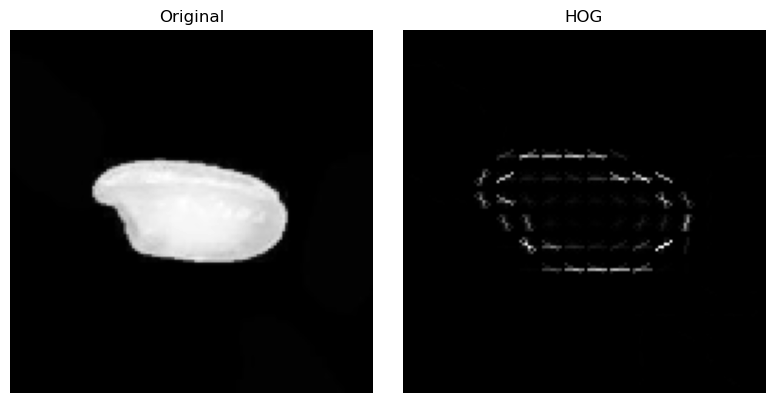

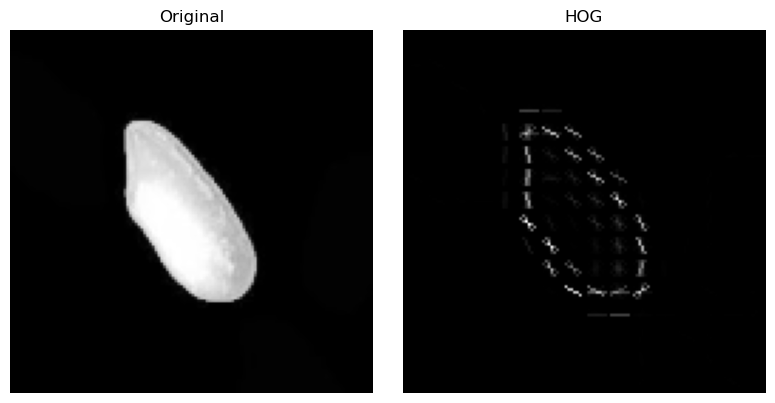

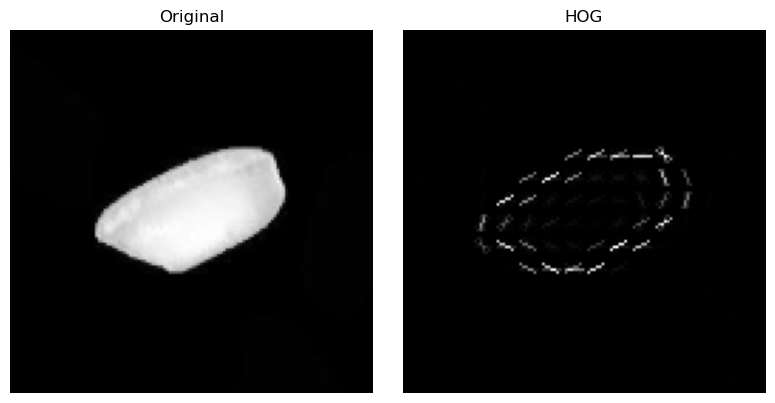

Data shape: (15000, 100)
Labels: [0 1 2 3 4]
Image #1 shape: (49152,)
Image #2 shape: (49152,)
Image #3 shape: (49152,)
Image #4 shape: (49152,)
Image #5 shape: (49152,)
Image #6 shape: (49152,)
Image #7 shape: (49152,)
Image #8 shape: (49152,)
Image #9 shape: (49152,)
Image #10 shape: (49152,)


In [4]:
#preperation of all the pictures for SVM & KNN

images = []
labels = []
maxPerLabel = 3000
labelCounts = {}

for root,dirs,files in os.walk(folderPath):
    label = os.path.basename(root)
    labelCounts.setdefault(label, 0)
    for filename in files:
        if filename.lower().endswith(('.jpg','.jpeg','.png')):
            if  labelCounts[label] >= maxPerLabel:
                break 
                
            filePath = os.path.join(root,filename)
            img = mpimg.imread(filePath)
            

            imgResized = ski.transform.resize(img,(128,128,3))
            #here is the main difference between the preparations (color does not improve in this case in knn or svm)
            imgGray = ski.color.rgb2gray(imgResized)
            fd = ski.feature.hog(imgGray, pixels_per_cell = (8,8),cells_per_block = (2,2))
           
            if len(images) < 3:
                _, hog_image = ski.feature.hog(imgGray, pixels_per_cell=(8, 8),cells_per_block=(2, 2), visualize=True)
                fig, axs_hog = plt.subplots(1, 2, figsize=(8, 4))
                axs_hog[0].imshow(imgGray, cmap='gray')
                axs_hog[0].set_title('Original')
                axs_hog[0].axis('off')
                axs_hog[1].imshow(hog_image, cmap='gray')
                axs_hog[1].set_title('HOG')
                axs_hog[1].axis('off')
                plt.tight_layout()
                plt.show()
                
            

            images.append(imgResized.flatten())
            labels.append(label)
            labelCounts[label] += 1

 
le = LabelEncoder()
y_encoded = le.fit_transform(labels)
X = np.array(images)
y = np.array(y_encoded)

pca = sklearn.decomposition.PCA(n_components=100)
X = pca.fit_transform(X)

print("Data shape:", X.shape)
print("Labels:", np.unique(y))


for i, img in enumerate(images[:10]):  
    print(f"Image #{i+1} shape:", img.shape)
    


In [10]:
#preparation of all the pictures for CNN
images = []
labels = []
maxPerLabel = 3000
labelCounts = {}

for root,dirs,files in os.walk(folderPath):
    label = os.path.basename(root)
    labelCounts.setdefault(label, 0)
    for filename in files:
        if filename.lower().endswith(('.jpg','.jpeg','.png')):
            if  labelCounts[label] >= maxPerLabel:
                break 
                
            filePath = os.path.join(root,filename)
            img = mpimg.imread(filePath)
            imgResized = ski.transform.resize(img,(64,64,3))
            images.append(imgResized)
            labels.append(label)
            labelCounts[label] += 1

 
le = LabelEncoder()
y_encoded = le.fit_transform(labels)
X = np.array(images)
y = np.array(y_encoded)
#display the number of pictures and thier sizes,dimantions
print("Data shape:", X.shape)
print("Labels:", np.unique(y))
for i, img in enumerate(images[:10]):  
    print(f"Image #{i+1} shape:", img.shape)
    

Data shape: (15000, 64, 64, 3)
Labels: [0 1 2 3 4]
Image #1 shape: (64, 64, 3)
Image #2 shape: (64, 64, 3)
Image #3 shape: (64, 64, 3)
Image #4 shape: (64, 64, 3)
Image #5 shape: (64, 64, 3)
Image #6 shape: (64, 64, 3)
Image #7 shape: (64, 64, 3)
Image #8 shape: (64, 64, 3)
Image #9 shape: (64, 64, 3)
Image #10 shape: (64, 64, 3)


## Part 3 - Experiments
You could add as many code cells as needed

In [6]:
#test on SVM

X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
modelSVM = SVC()
startTime = time.time()
X_train = X_train / 255.0
X_test = X_test /255.0
#check to see the best hyperparameters
paramGrid = {
     'C': [0.1, 1, 10],
     'gamma': [0.001, 0.01, 0.1],
     'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
    'degree': [2, 3, 4]
}

gridSearch = model_selection.GridSearchCV(modelSVM, paramGrid, cv=5, n_jobs=-1, verbose=2)
gridSearch.fit(X_train,y_train)
results_df = pd.DataFrame(gridSearch.cv_results_)
print(results_df[['params', 'mean_test_score', 'std_test_score', 'rank_test_score']])
bestModel = gridSearch.best_estimator_
endTime = time.time()
trainingDuration = endTime - startTime
print("training time",round(trainingDuration,2))
y_pred = bestModel.predict(X_test)
print("best params",gridSearch.best_params_)
print("Confusion matrix:\n", metrics.confusion_matrix(y_test, y_pred))
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))
print("Classification report:\n", metrics.classification_report(y_test, y_pred))



 






Fitting 5 folds for each of 108 candidates, totalling 540 fits
                                                params  mean_test_score  \
0    {'C': 0.1, 'degree': 2, 'gamma': 0.001, 'kerne...         0.776667   
1    {'C': 0.1, 'degree': 2, 'gamma': 0.001, 'kerne...         0.624000   
2    {'C': 0.1, 'degree': 2, 'gamma': 0.001, 'kerne...         0.774667   
3    {'C': 0.1, 'degree': 2, 'gamma': 0.001, 'kerne...         0.774667   
4    {'C': 0.1, 'degree': 2, 'gamma': 0.01, 'kernel...         0.776667   
..                                                 ...              ...   
103  {'C': 10, 'degree': 4, 'gamma': 0.01, 'kernel'...         0.776667   
104  {'C': 10, 'degree': 4, 'gamma': 0.1, 'kernel':...         0.968417   
105  {'C': 10, 'degree': 4, 'gamma': 0.1, 'kernel':...         0.347083   
106  {'C': 10, 'degree': 4, 'gamma': 0.1, 'kernel':...         0.953833   
107  {'C': 10, 'degree': 4, 'gamma': 0.1, 'kernel':...         0.912250   

     std_test_score  rank_test_score

In [8]:
#test on KNN
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

scale = sklearn.preprocessing.StandardScaler()

X_train = scale.fit_transform(X_train)
X_test = scale.transform(X_test)

#check to see the best hyperparameters (p:= 1 for manhattan, 2 for Euclid) 
paramsKNN = {'n_neighbors': [3, 5, 7, 9, 11], 'weights': ['uniform', 'distance'], 'p': [1, 2]}



gridKnn = GridSearchCV(estimator=KNeighborsClassifier(),param_grid=paramsKNN,cv=5,scoring='accuracy',n_jobs=-1,verbose=2)

results_df = pd.DataFrame(gridSearch.cv_results_)
print(results_df[['params', 'mean_test_score', 'std_test_score', 'rank_test_score']])
gridKnn.fit(X_train, y_train)

bestKnn=gridKnn.best_estimator_
y_pred = bestKnn.predict(X_test)

print("best params",gridKnn.best_params_)
print("Confusion matrix:\n", metrics.confusion_matrix(y_test, y_pred))
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))
print("Classification report:\n", metrics.classification_report(y_test, y_pred))


                                                params  mean_test_score  \
0    {'C': 0.1, 'degree': 2, 'gamma': 0.001, 'kerne...         0.776667   
1    {'C': 0.1, 'degree': 2, 'gamma': 0.001, 'kerne...         0.624000   
2    {'C': 0.1, 'degree': 2, 'gamma': 0.001, 'kerne...         0.774667   
3    {'C': 0.1, 'degree': 2, 'gamma': 0.001, 'kerne...         0.774667   
4    {'C': 0.1, 'degree': 2, 'gamma': 0.01, 'kernel...         0.776667   
..                                                 ...              ...   
103  {'C': 10, 'degree': 4, 'gamma': 0.01, 'kernel'...         0.776667   
104  {'C': 10, 'degree': 4, 'gamma': 0.1, 'kernel':...         0.968417   
105  {'C': 10, 'degree': 4, 'gamma': 0.1, 'kernel':...         0.347083   
106  {'C': 10, 'degree': 4, 'gamma': 0.1, 'kernel':...         0.953833   
107  {'C': 10, 'degree': 4, 'gamma': 0.1, 'kernel':...         0.912250   

     std_test_score  rank_test_score  
0          0.013115               31  
1          0.011404  

In [12]:
#test on CNN 
print("X shape:", X.shape)
print("y shape:", y.shape)
print("Pixel range:", X.min(), "-", X.max())
print("Labels:", np.unique(y))


X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

#allows the model to rotate and zoom as seems fit 
data_augmentation = tf.keras.Sequential([
    layers.RandomFlip("horizontal"),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.1)
])

 
def create_model():
    model = models.Sequential([
        layers.Input(shape=(64, 64, 3)),
        data_augmentation,
        layers.Rescaling(1./255),

        layers.Conv2D(32, 3, padding="same", activation='relu'),
        layers.BatchNormalization(),
        layers.MaxPooling2D(),
        layers.Dropout(0.2),

        layers.Conv2D(64, 3, padding="same", activation='relu'),
        layers.BatchNormalization(),
        layers.MaxPooling2D(),
        layers.Dropout(0.3),

        layers.Flatten(),
        layers.Dense(128, activation='relu'),
        layers.BatchNormalization(),
        layers.Dropout(0.5),
        layers.Dense(5, activation='softmax')
    ])
    return model


model = create_model()

model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

callbacks = [
    tf.keras.callbacks.EarlyStopping(patience=8,min_delta = 0.01, restore_best_weights=True),
    tf.keras.callbacks.ReduceLROnPlateau(factor=0.2, patience=5, verbose=1),
    tf.keras.callbacks.ModelCheckpoint("best_model.keras", save_best_only=True)
]


history = model.fit(
    X_train, y_train,
    validation_split=0.1,
    epochs=20,
    batch_size=32,
    callbacks=callbacks,
    verbose=1
)




# test evaluation
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=0)
print(f"\nFinal test accuracy: {test_acc:.4f}")


X shape: (15000, 64, 64, 3)
y shape: (15000,)
Pixel range: 0.0 - 0.9999999999999999
Labels: [0 1 2 3 4]
Epoch 1/20
338/338 ━━━━━━━━━━━━━━━━━━━━ 56s 162ms/step - accuracy: 0.6679 - loss: 0.9150 - val_accuracy: 0.1942 - val_loss: 3.6889 - learning_rate: 1.0000e-04
Epoch 2/20
338/338 ━━━━━━━━━━━━━━━━━━━━ 51s 151ms/step - accuracy: 0.9420 - loss: 0.1876 - val_accuracy: 0.8183 - val_loss: 0.5312 - learning_rate: 1.0000e-04
Epoch 3/20
338/338 ━━━━━━━━━━━━━━━━━━━━ 50s 148ms/step - accuracy: 0.9738 - loss: 0.0961 - val_accuracy: 0.3783 - val_loss: 4.3372 - learning_rate: 1.0000e-04
Epoch 4/20
338/338 ━━━━━━━━━━━━━━━━━━━━ 50s 149ms/step - accuracy: 0.9786 - loss: 0.0784 - val_accuracy: 0.9367 - val_loss: 0.1826 - learning_rate: 1.0000e-04
Epoch 5/20
338/338 ━━━━━━━━━━━━━━━━━━━━ 50s 148ms/step - accuracy: 0.9814 - loss: 0.0666 - val_accuracy: 0.7608 - val_loss: 1.4320 - learning_rate: 1.0000e-04
Epoch 6/20
338/338 ━━━━━━━━━━━━━━━━━━━━ 50s 147ms/step - accuracy: 0.9840 - loss: 0.0522 - val_accura

## Part 4 - Training 
Use the best combination of feature engineering, model (algorithm and hyperparameters) from the experiment part (part 3)

In [18]:
print("X shape:", X.shape)
print("y shape:", y.shape)
print("Pixel range:", X.min(), "-", X.max())
print("Labels:", np.unique(y))


X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)


data_augmentation = tf.keras.Sequential([
    layers.RandomFlip("horizontal"),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.1)
])


def create_model():
    model = models.Sequential([
        layers.Input(shape=(64, 64, 3)),
        data_augmentation,
        layers.Rescaling(1./255),

        layers.Conv2D(32, 3, padding="same", activation='relu'),
        layers.BatchNormalization(),
        layers.MaxPooling2D(),
        layers.Dropout(0.2),

        layers.Conv2D(64, 3, padding="same", activation='relu'),
        layers.BatchNormalization(),
        layers.MaxPooling2D(),
        layers.Dropout(0.3),

        layers.Flatten(),
        layers.Dense(128, activation='relu'),
        layers.BatchNormalization(),
        layers.Dropout(0.5),
        layers.Dense(5, activation='softmax')
    ])
    return model


model = create_model()
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

callbacks = [
    tf.keras.callbacks.EarlyStopping(patience=8,min_delta = 0.01, restore_best_weights=True),
    tf.keras.callbacks.ReduceLROnPlateau(factor=0.2, patience=5, verbose=1),
    tf.keras.callbacks.ModelCheckpoint("best_model.keras", save_best_only=True)
]

start = time.time()
history = model.fit(
    X_train, y_train,
    validation_split=0.1,
    epochs=20,
    batch_size=32,
    callbacks=callbacks,
    verbose=1
)
end = time.time()

print(f"\nTraining took {(end - start) / 60:.2f} minutes")


test_loss, test_acc = model.evaluate(X_test, y_test, verbose=0)
print(f"\nFinal test accuracy: {test_acc:.4f}")





X shape: (15000, 64, 64, 3)
y shape: (15000,)
Pixel range: 0.0 - 0.9999999999999999
Labels: [0 1 2 3 4]
Epoch 1/20
338/338 ━━━━━━━━━━━━━━━━━━━━ 40s 116ms/step - accuracy: 0.6339 - loss: 1.0149 - val_accuracy: 0.1942 - val_loss: 2.6430 - learning_rate: 1.0000e-04
Epoch 2/20
338/338 ━━━━━━━━━━━━━━━━━━━━ 39s 116ms/step - accuracy: 0.8580 - loss: 0.3833 - val_accuracy: 0.3150 - val_loss: 1.5341 - learning_rate: 1.0000e-04
Epoch 3/20
338/338 ━━━━━━━━━━━━━━━━━━━━ 39s 116ms/step - accuracy: 0.9286 - loss: 0.2111 - val_accuracy: 0.8717 - val_loss: 0.2908 - learning_rate: 1.0000e-04
Epoch 4/20
338/338 ━━━━━━━━━━━━━━━━━━━━ 40s 119ms/step - accuracy: 0.9594 - loss: 0.1252 - val_accuracy: 0.9417 - val_loss: 0.1508 - learning_rate: 1.0000e-04
Epoch 5/20
338/338 ━━━━━━━━━━━━━━━━━━━━ 38s 113ms/step - accuracy: 0.9788 - loss: 0.0787 - val_accuracy: 0.2200 - val_loss: 7.5025 - learning_rate: 1.0000e-04
Epoch 6/20
338/338 ━━━━━━━━━━━━━━━━━━━━ 37s 109ms/step - accuracy: 0.9799 - loss: 0.0685 - val_accura

## Part 5 - Apply on test and show model performance estimation


Final test accuracy: 0.9937
94/94 ━━━━━━━━━━━━━━━━━━━━ 3s 30ms/step


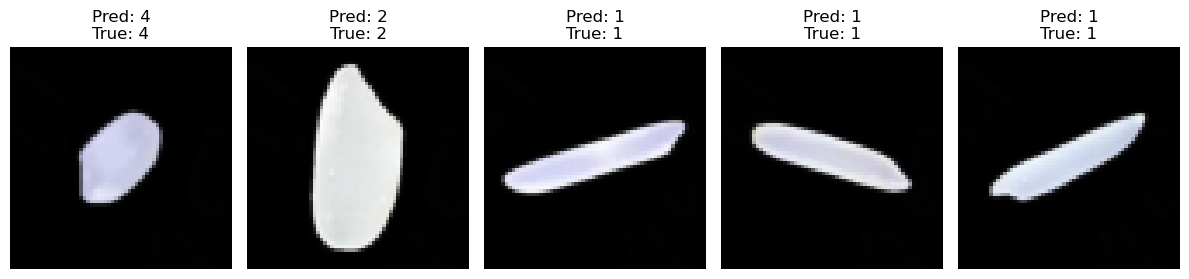

{0: 2400, 1: 2400, 2: 2400, 3: 2400, 4: 2400}
              precision    recall  f1-score   support

     Arborio       0.99      1.00      0.99       600
     Basmati       0.99      0.99      0.99       600
      Ipsala       1.00      1.00      1.00       600
     Jasmine       0.99      0.98      0.99       600
   Karacadag       1.00      1.00      1.00       600

    accuracy                           0.99      3000
   macro avg       0.99      0.99      0.99      3000
weighted avg       0.99      0.99      0.99      3000



In [20]:
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=0)
print(f"\nFinal test accuracy: {test_acc:.4f}")
y_pred_probs = model.predict(X_test)
y_pred = np.argmax(y_pred_probs, axis=1)
plt.figure(figsize=(12, 4))
for i in range(5):
    plt.subplot(1, 5, i + 1)
    plt.imshow(X_test[i])
    plt.axis('off')
    plt.title(f"Pred: {y_pred[i]}\nTrue: {y_test[i]}")
plt.tight_layout()
plt.show()
unique, counts = np.unique(y_train, return_counts=True)
print(dict(zip(unique, counts)))
target_names = le.classes_
print(metrics.classification_report(y_test, y_pred,target_names=target_names))



